![BTS](img/Logo-BTS.jpg)

# Session 19: Time Series Analysis (II)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-12-11)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/18-Time-Series-Analysis-II.ipynb)

## Exercise 1: ARIMA forecast

1. Read `data/air_passengers.csv` into a pandas **`Series`**, parsing the dates, indexing properly, and making sure there are no extraneous values (_Hint: Check the last rows_)
2. Use statsmodels to decompose the seasonality of the series. Which model do you think it works best: `additive` or `multiplicative`?
3. Use `statsmodels.graphics.tsaplots.plot_acf` to plot the autocorrelation function of the `seasonal` and `observed` components. Looking at the plots, what would you say it's the period of the seasonality?
4. Save the first 70 % of points in a variable called `train`, and the remaining 30 % in `test`
5. Use that seasonality period `m` as the only input to `pmdarima.arima.auto_arima` to automatically obtain a model and nothing else. What is the order?
6. Save the model to a variable and use its `.predict` method to extract the prediction that overlaps with the test data, including the confidence intervals, and plot them. What happens? Is the model good?
7. Use `model.resid()` to retrieve the residuals of the model and do a scatter plot to display their evolution in time
8. Play with the parameters of `auto_arima` (don't raise them too much, and don't change the seasonality) to try to get a better result.

![Forecast](img/sarimax.png)

In [1]:
import pandas as pd

In [76]:
data = pd.read_csv("data/air_passengers.csv", parse_dates=["Month"],
                   index_col="Month", skipfooter=2, engine='python')
data = data.iloc[:, 0]
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60, dtype: int64

In [29]:
%matplotlib inline

In [19]:
data.index.dtype

dtype('<M8[ns]')

In [65]:
from statsmodels.tsa.seasonal import freq_to_period, seasonal_decompose

In [37]:
freq_to_period??

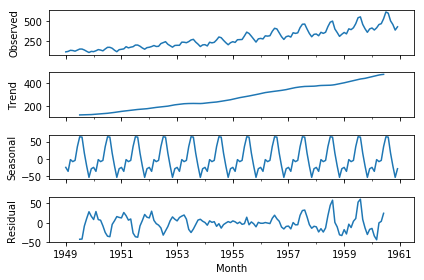

In [70]:
res_add = seasonal_decompose(data)
res_add.plot();

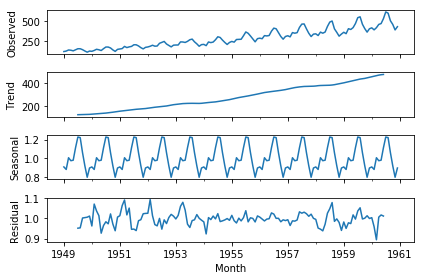

In [71]:
res_mul = seasonal_decompose(data, model="multiplicative")
res_mul.plot();

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
adfuller(res_add.resid.dropna())

(-5.298427587050738,
 5.516868902226142e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 849.940140147128)

In [74]:
adfuller(res_mul.resid.dropna())

(-7.4159246408852235,
 6.936028992598951e-11,
 7,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 -513.429581554826)

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [82]:
data.corr(data)

1.0

In [87]:
data.corr(data.shift(1))

0.9601946480498523

In [90]:
data.corr(data.shift(2))

0.8956753113926396

In [84]:
from statsmodels.tsa.stattools import acf

In [89]:
acf(data)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

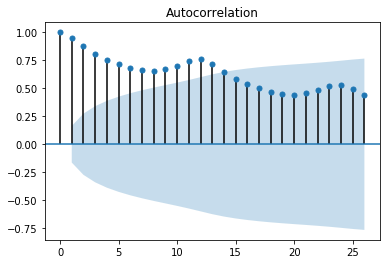

In [93]:
plot_acf(res_mul.observed, lags=26);

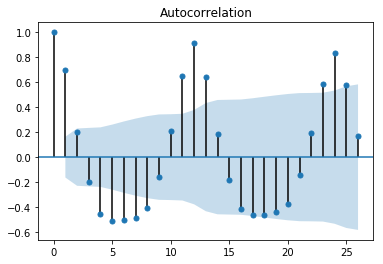

In [99]:
plot_acf(res_mul.seasonal, lags=26);

In [100]:
import numpy as np

In [114]:
#from sklearn.model_selection import train_test_split

In [107]:
train, test = np.split(data, [int(len(data) * .7)])

In [108]:
len(train)

100

In [109]:
len(test)

44

In [110]:
len(data)

144

In [115]:
from pmdarima.arima import auto_arima

In [151]:
model = auto_arima(
    train, m=12,
    D=1,
)

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, whic

In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [163]:
len(train)

100

In [196]:
import statsmodels as st

In [197]:
st.__version__

'0.9.0'

In [191]:
model = SARIMAX(
    train,
    order=(1, 0, 0),
    seasonal_order=(0, 1, 0, 12),
    #trend='t',
)
results = model.fit()

In [193]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         Statespace Model Results                                                         
==========================================================================================================================================
Dep. Variable:     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60   No. Observations:                  100
Model:                                                             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -322.625
Date:                                                                            Fri, 14 Dec 2018   AIC                            651.249
Time:                                                                                    12:14:58   BIC                            658.681
Sample:                                                                                01-01-1949   HQIC                           654.243
                                                                                     - 04-01-1957                                         
Covariance Type:                                                                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.1222      0.037      3.284      0.001       0.049       0.195
ar.L1          0.7510      0.073     10.357      0.000       0.609       0.893
sigma2        88.6818     13.227      6.705      0.000      62.758     114.605
===================================================================================
Ljung-Box (Q):                       46.90   Jarque-Bera (JB):                 1.57
Prob(Q):                              0.21   Prob(JB):                         0.46
Heteroskedasticity (H):               1.21   Skew:                             0.33
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
model

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -316.898
Date:                            Fri, 14 Dec 2018   AIC                            645.796
Time:                                    12:06:11   BIC                            660.591
Sample:                                         0   HQIC                           651.754
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.277      0.019      0.985      -0.538       0.548
ar.L1         -0.3011      0.097     -3.101      0.002      -0.491      -0.111
ar.S.L12       0.6809      0.124      5.480      0.000       0.437       0.925
ar.S.L24       0.3174      0.101      3.156      0.002       0.120       0.515
ma.S.L12      -0.9779      0.588     -1.663      0.096      -2.130       0.174
sigma2        76.1708     39.833      1.912      0.056      -1.900     154.242
===================================================================================
Ljung-Box (Q):                       39.60   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.49   Prob(JB):                         0.21
Heteroskedasticity (H):               1.31   Skew:                             0.47
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -409.496
Date:                            Fri, 14 Dec 2018   AIC                            830.991
Time:                                    11:37:36   BIC                            846.562
Sample:                                         0   HQIC                           837.291
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9536      0.389      2.454      0.014       0.192       1.715
ar.L1          0.5860      0.148      3.949      0.000       0.295       0.877
ma.L1         -0.6527     14.434     -0.045      0.964     -28.943      27.638
ma.L2         -0.3472      4.930     -0.070      0.944     -10.010       9.315
ma.S.L12       0.7329      0.112      6.542      0.000       0.513       0.953
sigma2       204.3119   2927.305      0.070      0.944   -5533.101    5941.725
===================================================================================
Ljung-Box (Q):                      109.21   Jarque-Bera (JB):                 7.66
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               3.20   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
import matplotlib.pyplot as plt

In [198]:
preds = results.forecast(len(test) * 2)

In [180]:
#preds, conf_ints = model.predict(len(test), return_conf_int=True)

In [154]:
preds = pd.Series(preds, index=test.index)

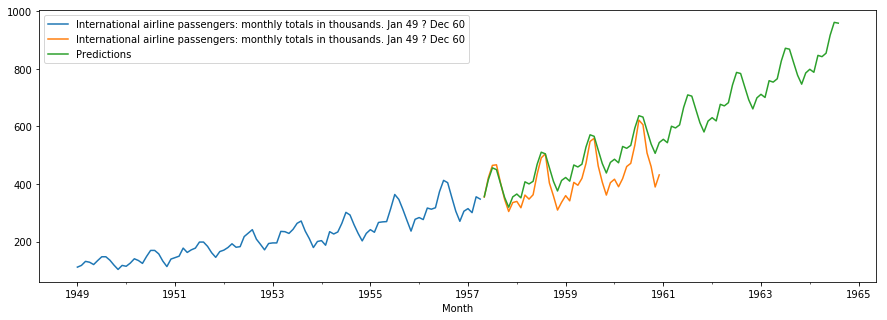

In [199]:
fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax)
test.plot(ax=ax)
preds.plot(ax=ax, label="Predictions");
ax.legend();

## Exercise 2: Multiple seasonality experiments

The Gas Demand dataset exhibits multiple seasonality, because we have _daily_ data that repeats over _weeks_ and _years_. Properly analyzing this is more difficult than "just" using an ARIMA model. **The objective is to do a forecast**.

1. Read `data/gas_demand.csv` into a pandas **`DataFrame`** again, parsing the dates and indexing properly
2. Split the dataset in 70 % of train and 30 % of test.
3. Select a seasonality (for example `m=7`, the weekly pattern) and use `auto_arima` with that value to try to create a model that suits our dataset. What happens?
4. Experiments:
  * Keep only the last year month and create an `auto_arima` model.
  * Extract the trend using a moving average (as we did in the previous class) and try to use it as an **exogenous** variable in `auto_arima`.
  * Use a classical but non-ARIMA model, for example `statsmodels.tsa.holtwinters.ExponentialSmoothing`
  * Use Prophet (from Facebook) to produce a good forecast.
5. Plot the residuals of at least two of these models to compare them. Which one is better? Keep on experimenting.